In [1]:
using Revise
using DrWatson; @quickactivate "TopoStochSim"
using GraphModels
using NonEqDigits
using GLMakie
using CairoMakie
using JLD2

Precompiling packages...
   6257.1 ms  ✓ NonEqDigits
  1 dependency successfully precompiled in 8 seconds. 346 already precompiled.
Precompiling packages...
  21418.8 ms  ✓ CairoMakie
  1 dependency successfully precompiled in 22 seconds. 240 already precompiled.


In [2]:
includet("../scripts/ma_graphviz.jl")
using GraphvizDotLang
using GraphvizDotLang: attr

In [3]:
using Luxor

# Setup

In [290]:
intrules_byenzyme = [
    252,
    188,
    168,
    254,
    174,
    184,
    166,
    190,
    160,
    170,
    182,
    178,
    162
];
intrules_byeqp = [
    252, 188, # 60
    168, 184, # 57
    254, 174, 166, 190, 182, # 54
    160, 170, 162, 178 # 51
]
intrules = intrules_byenzyme;

# Looking at all 0s vs all 1s

## Base

K01 = [0 0; 1 1]
K10 = [0 0; 0 0]


┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweighteddigraph.jl:170


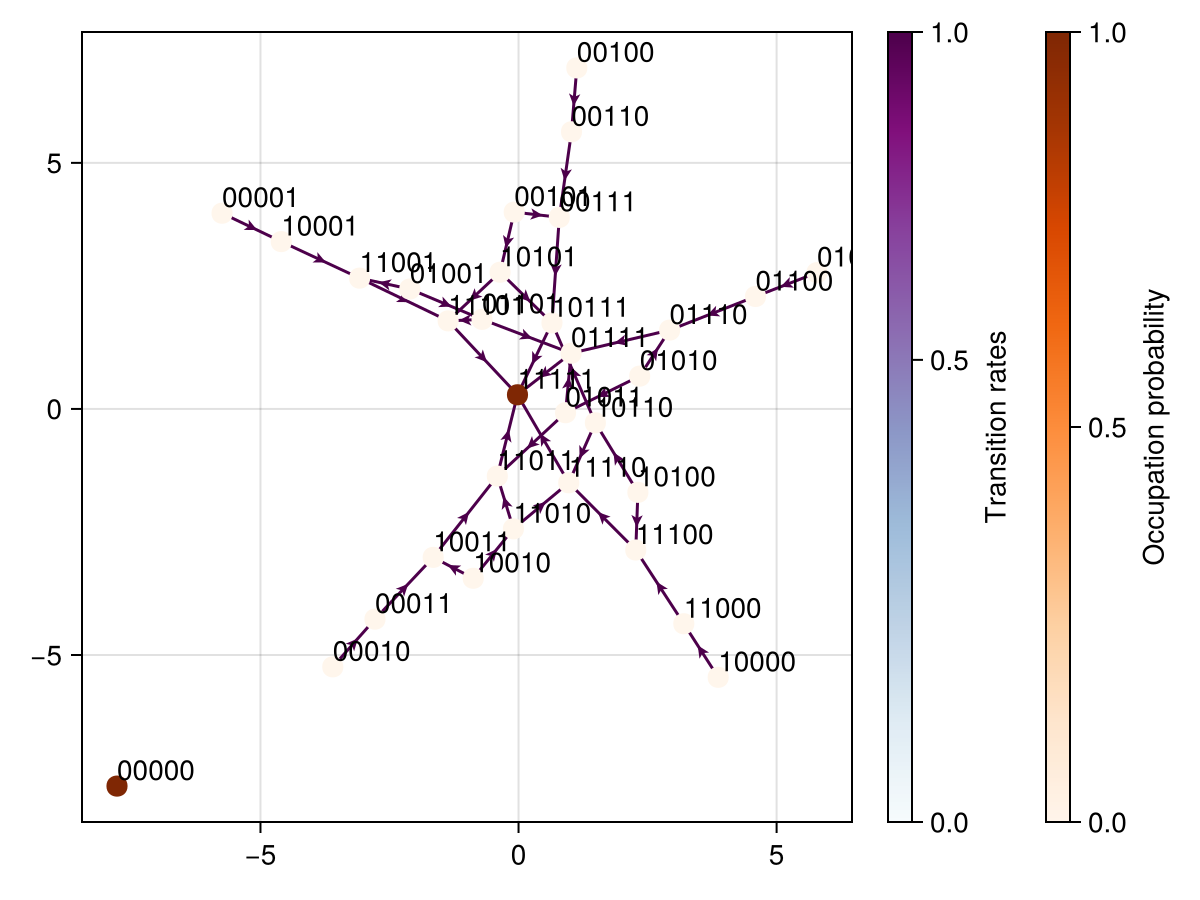

In [3]:
# Non-eq rule setup (looking for acs)
rule = 252
N = 5
ned = make_ca_ned(N, rule)
faa = plotgm(ned;
    layout=Spring(dim=2),
    # layout=Spectral(dim=3),
    ss=supersteadystate(ned),
    e_color=:rates,
    edge_plottype=:linesegments,
    flabels=true,
    # roffset_devs=0.004
)
GLMakie.closeall()
# display(GLMakie.Screen(), faa)
faa

## Graphviz + Luxor testing

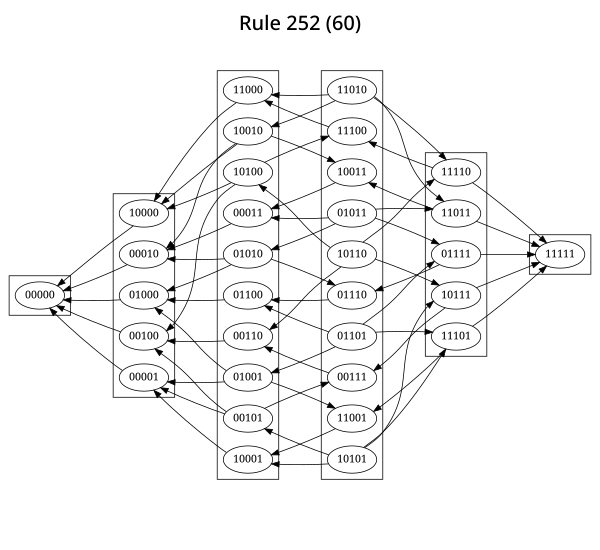

In [125]:
w, h = 600, 550
tmargin = 30

tsvg_fname = tempname() * ".svg"
GraphvizDotLang.save(g, tsvg_fname)
gim = readsvg(tsvg_fname)

ss = min(w / gim.width, h / (gim.height-tmargin))

@drawsvg begin
    fontsize(20)
    Luxor.text(full_code_label(252), 0, -h/2+tmargin; halign=:center)
    scale(ss)
    placeimage(gim; centered=true)
end w h

# All graphviz diagrams

In [ ]:
N = 5
w, h = 600, 550
tmargin = 30

ims = []
for r in intrules_byeqp
    ned = make_ca_ned(N, r; show=false)
    g = kaka(ned;
        layout="dot",
        # remincross="false",
        # pack="true",
        # newrank="true",
        # concentrate="true",
        # compount="true"
    )
    
    tsvg_fname = tempname() * ".svg"
    GraphvizDotLang.save(g, tsvg_fname)
    gim = readsvg(tsvg_fname)
    
    ss = min(w / gim.width, h / (gim.height-tmargin))
    
    im = @drawsvg begin
        fontsize(20)
        Luxor.text(full_code_label(r; numenzymes=true), 0, -h/2+tmargin; halign=:center)
        scale(ss)
        placeimage(gim; centered=true)
    end w h

    push!(ims, im)
end

master_d = reduce(vcat, ims)
@pdf begin
    placeimage(master_d; centered=true)
end master_d.width master_d.height "../data/ma_0s_vs_1s/gv_plots.pdf"
master_d

# Bits and bobs